In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [16]:
# Load dataset (Pima Indians Diabetes Dataset from a CSV file)
url = "pima-indians-diabetes.csv"
# columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigree", "Age", "Outcome"]
# data = pd.read_csv(url, header=None, names=columns)
data = pd.read_csv(url)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### EDA

In [38]:
# Summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

In [40]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Users\rakes\AppData\Local\Temp\ipykernel_11204\1035293874.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts, palette="viridis")


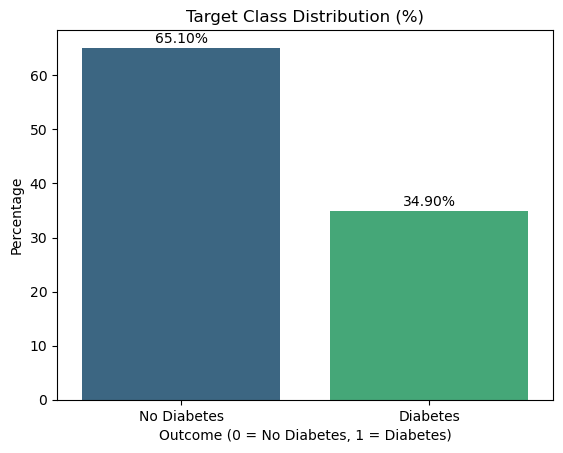

In [49]:
# Distribution of target class (Outcome) with percentages
class_counts = data['Outcome'].value_counts(normalize=True) * 100
sns.barplot(x=class_counts.index, y=class_counts, palette="viridis")
plt.title("Target Class Distribution (%)")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Percentage")
plt.xticks(ticks=[0, 1], labels=["No Diabetes", "Diabetes"])
for i, v in enumerate(class_counts):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')
plt.show()

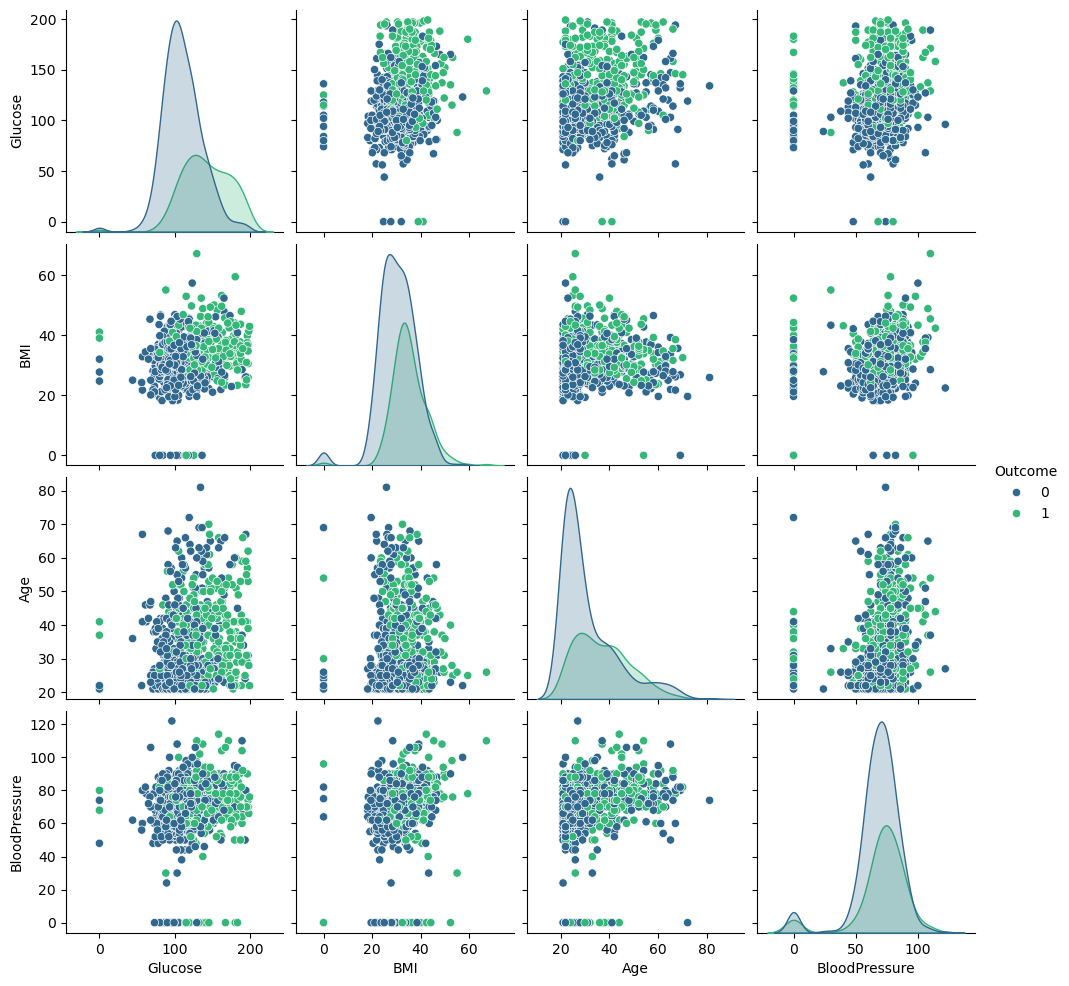

In [45]:
# Pairplot to visualize relationships between features
sns.pairplot(data, hue="Outcome", vars=["Glucose", "BMI", "Age", "BloodPressure"], palette="viridis")
plt.show()

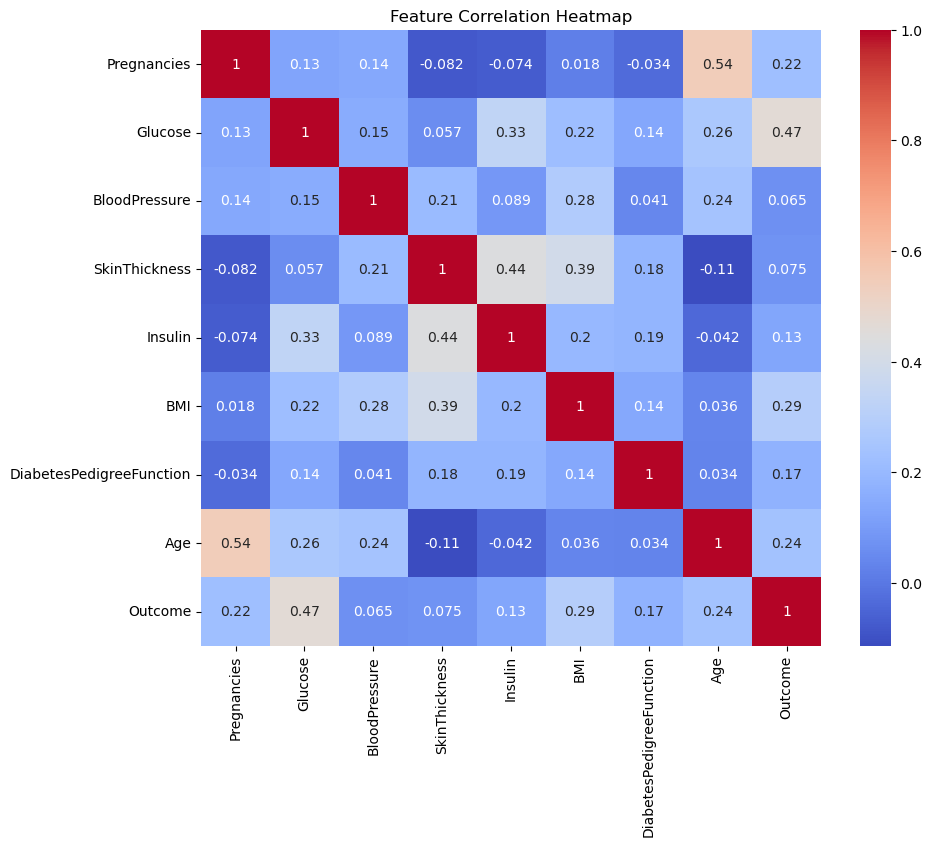

In [47]:
# Heatmap of feature correlations
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
# Split into features and target
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Preprocessing: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Set up the parameter grid for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

In [26]:
# Initialize and perform GridSearchCV
svm_model = SVC(random_state=42)
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [28]:
# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [30]:
# Make predictions with the best model
y_pred = best_model.predict(X_test)

In [32]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82        99
           1       0.69      0.67      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

